# Data Frame

* DataFrame é logicamente equivalente a uma tabela relacional
* Representa uma tabela de dados com linhas e colunas. 
* A lista que define as colunas e os tipos dentro dessas colunas é chamada de esquema. 
* Utilizado muito com R e Python/pandas

https://spark.apache.org/docs/latest/sql-programming-guide.html

https://spark.apache.org/docs/latest/api/python/index.html

Obs: é possível fazer o mesmo de diversas formas diferentes. **Não se assuste**

In [1]:
#import findspark
#findspark.init()

import pyspark
from pyspark.sql import SparkSession

#importando as classes que possuem as funcoes do Spark que vamos utilizar nessa aula
from pyspark.sql.functions import *

#SparkSession é utilizado a partir do 2.0 em diante 
spark = SparkSession.builder.getOrCreate()

Vamos criar nosso data frame a partir de um arquivo:
* Obs: Utilizamos o sparkSession para criar nosso Data Frame, pois estamos utilizando a versao 2.x do Spark

In [2]:
df = spark.read.csv('train.csv')

Diferente do RDD, utilizamos o método **.show()** para exibir os dados de uma váriavel do tipo Data Frame

In [4]:
df.show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|        _c0|     _c1|   _c2|                 _c3|   _c4|_c5|  _c6|  _c7|             _c8|    _c9| _c10|    _c11|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

Utilizamos o comando **.printSchema()** para exibir o dataType de cada coluna do nosso data frame.

In [5]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



##  Sobre schema

* Um esquema define os nomes e tipos de coluna de um DataFrame. 
* Você pode definir esquemas manualmente ou ler um esquema de uma fonte de dados (geralmente chamado de esquema em leitura). 
* Os esquemas consistem em tipos, o que significa que você precisa de uma maneira de especificar o que está onde.

In [7]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType

Criando nosso primeiro schema. Para isso, precisamos importar as classes necessárias:

* SctuctType:
* StructField:
* DataType: Podendo ser String, Date, Long, Integer ... Type()

Ex:

schema = StructType([
  StructField("nmCampo", IntegerType(), True)
])

In [10]:
# Criando um schema que define as colunas e o data type de cada um, referentes ao arquivo .csv
varSchema = StructType([
    StructField('PassengerId', IntegerType(), True),
    StructField('Survived', StringType(), True),
    StructField('PClass', StringType(), True),
    StructField('Name', StringType(), True),
    StructField('Sex', StringType(), True),
    StructField('Age', StringType(), True),
    StructField('SibSp', StringType(), True),
    StructField('Parch', StringType(), True),
    StructField('Ticket', StringType(), True),
    StructField('Fire', StringType(), True),
    StructField('Cabin', StringType(), True),
    StructField('Embarked', StringType(), True)
])

In [11]:
# vamos incluir o schema na leitura do arquivo train.csv
# Quando o arquivo é sepado por virgula, não precisa colocar o sep=',' porque é o default, então ele vai automático.
df = spark.read.csv('train.csv', schema=varSchema) 

In [12]:
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|PClass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fire|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|       null|    null|  null|                null|  null|null| null| null|            null|   null| null|    null|
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [13]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: string (nullable = true)
 |-- PClass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fire: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



Criamos um Schema manualmente para definir os nomes de cada coluna do nosso arquivo .csv

Porém, o Spark possui métodos que podem nos auxiliar quanto a isso no momento da sua leitura.

Vamos analisar pela documentação:

https://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=csv#pyspark.sql.DataFrameReader.csv

In [14]:
# Vamos informar para o Data Frame de que o .csv possui cabeçalho
df = spark.read.csv('train.csv', header=True)

In [15]:
df.show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [16]:
# Vamos novamente visualizar seu schema, agora com as colunas renomeadas pelo método header=True do .csv()
df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



é possível identificar que ao carregar o arquivo, o Spark informa que todos as colunas são do tipo String quando não setamos manualmente o data type de cada coluna, porém, com sua inteligência, podemos utilizar o comando **InferSchema** e deixar que o próprio spark faça isso para nós

In [17]:
# Incluindo InferSchema para que o Spark defina o schema de cada coluna automaticamente
df = spark.read.csv('train.csv', header=True, inferSchema=True)

In [18]:
# Vamos então visualizar o schema de cada coluna. Obs: Processo pode ser custoso dependendo do tamanho da sua base.
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



Vamos criar nosso data frame a partir de um RDD, que estudamos na ultima aula:

In [19]:
from pyspark import SparkContext
from pyspark.sql import Row

sc = SparkContext.getOrCreate()

rdd = sc.parallelize([Row(ID='1',NOME='Eric',IDADE='31')])
rdd.collect()

[Row(ID='1', IDADE='31', NOME='Eric')]

Para criar um data frame a partir de um RDD, podemos utilizar dois tipos de métodos:

* rdd.toDF()
* spark.createDataFrame()

Em ambos utilizam **schema**, estrutura que vamos entender mais abaixo

In [20]:
df = rdd.toDF()

In [21]:
df.show()

+---+-----+----+
| ID|IDADE|NOME|
+---+-----+----+
|  1|   31|Eric|
+---+-----+----+



## Colunas e expressões

Para Spark, as colunas são construções lógicas que simplesmente representam um valor calculado por registro por meio de uma expressão. Isso significa que para ter um valor real para uma coluna, precisamos ter uma linha; e para ter uma linha, precisamos ter um DataFrame. Você não pode manipular uma coluna individual fora do contexto de um DataFrame; você deve usar as transformações do Spark em um DataFrame para modificar o conteúdo de uma coluna.

In [22]:
col("criandoUmaColunaSpark")

Column<b'criandoUmaColunaSpark'>

In [23]:
df = spark.read.csv('train.csv', header=True, inferSchema=True)

Vamos utilizar o método **.select()** do data frame para selecionar qual **col** vamos exibir.

In [25]:
df.select(
    col('PassengerId')
).show(2)

+-----------+
|PassengerId|
+-----------+
|          1|
|          2|
+-----------+
only showing top 2 rows



Colunas são expressões, 

* Uma expressão é um conjunto de transformações em um ou mais valores em um registro em um DataFrame. 
* Uma expressão criada através da função expr é apenas uma referência de coluna do DataFrame. No caso mais simples, expr ("CriandoUmaColunaSpark") é equivalente a col ("CriandoUmaColunaSpark")

In [27]:
# Vamos utilizar expr para identificar se a coluna ID é maior que > 
# Obs: utilizamos o alias para alterar o nome da variavel nova
df.select(
    col("PassengerId").alias("ID"),
    expr("PassengerId > 5 as ColunaCalculada")
).show(10)

+---+---------------+
| ID|ColunaCalculada|
+---+---------------+
|  1|          false|
|  2|          false|
|  3|          false|
|  4|          false|
|  5|          false|
|  6|           true|
|  7|           true|
|  8|           true|
|  9|           true|
| 10|           true|
+---+---------------+
only showing top 10 rows



Podemos utilizar o expr para criar condições e capsula-las nos filtros

In [29]:
# Utilizando expr()
df.select("PassengerId").filter(expr("PassengerId > 5")).show(3)

+-----------+
|PassengerId|
+-----------+
|          6|
|          7|
|          8|
+-----------+
only showing top 3 rows



In [30]:
# Utilizando col()
df.select("PassengerId").filter(col("PassengerId") > 5).show(2)

+-----------+
|PassengerId|
+-----------+
|          6|
|          7|
+-----------+
only showing top 2 rows



## Manipulando um Dataframe

In [33]:
# .selectExpr()
df.selectExpr("Name as NovaColuna", "Name").show(2, truncate=False)

+---------------------------------------------------+---------------------------------------------------+
|NovaColuna                                         |Name                                               |
+---------------------------------------------------+---------------------------------------------------+
|Braund, Mr. Owen Harris                            |Braund, Mr. Owen Harris                            |
|Cumings, Mrs. John Bradley (Florence Briggs Thayer)|Cumings, Mrs. John Bradley (Florence Briggs Thayer)|
+---------------------------------------------------+---------------------------------------------------+
only showing top 2 rows



In [34]:
# .lit()
df.select(
    col("Name"),
    lit("Criando um literal")
).show(2, False)

+---------------------------------------------------+------------------+
|Name                                               |Criando um literal|
+---------------------------------------------------+------------------+
|Braund, Mr. Owen Harris                            |Criando um literal|
|Cumings, Mrs. John Bradley (Florence Briggs Thayer)|Criando um literal|
+---------------------------------------------------+------------------+
only showing top 2 rows



In [35]:
# .lit()
df.select(
    col("Name"),
    lit(2).alias("lit")
).show(2, False)

+---------------------------------------------------+---+
|Name                                               |lit|
+---------------------------------------------------+---+
|Braund, Mr. Owen Harris                            |2  |
|Cumings, Mrs. John Bradley (Florence Briggs Thayer)|2  |
+---------------------------------------------------+---+
only showing top 2 rows



In [ ]:
# .withColumn()
df.withColumn()

In [ ]:
# .withColumn() ²

In [ ]:
# .withColumnRenamed()

In [ ]:
# .cast()

In [ ]:
# .filter()

In [ ]:
# Filtro com mais de uma condição: .where()

In [ ]:
# distinct()

In [ ]:
# .count()

In [ ]:
# concat() e concat_ws()

In [ ]:
# .split() em colunas

In [ ]:
# .explode()

In [ ]:
# .coalesce()

In [ ]:
# .orderBy()

In [ ]:
# .groupBy()

## Exercícios

Utilizando nova base de cliente "tbcliente.csv":

* utilizando a base de cliente:
    * Criar um Data Frame (dfCliente). Abaixo estrutura da tabela:
        1. Nome
        2. Sobrenome
        3. Cidade
        4. Estado
        5. Email
        6. Sexo
        7. Titulo   
        
    
    * Identificar quais Estados temos na base
    * Contabilizar quantas pessoas são do sexo feminino/masculino
    * Criar nova coluna de nome completo inserindo, além de colocar o título do homem ou mulher
    * Formatar coluna de gênero para Masculino ou Feminino
    * Identificar o provedor de e-mail de cada pessoa


* ***Desafio*** criar um novo data frame com dois registros novos e ***uni-los*** no arquivo principal (dfCliente). Obs: Preencher todas as colunas 

* Utilizar tabela de DE/PARA de estado para buscar coluna com estado completo ***(carregar novo arquivo parquet "tabelaEstado.parquet")***.
* Remover coluna SIGLA do resultado
* Identificar quantos clientes são do Ceara
* Identificar quantos clientes são do Minas Gerais
* Identificar quantos clientes são de São Paulo E Rio de Janeiro

## Desafio [Atividade Bônus]

Dado um dataframe com duas colunas [id_cliente, categorias], fazer um dataframe resultado, com uma coluna pra cada tipo de categoria, com valor 1 caso aquela categoria exista e 0 caso não exista, isso para cada cliente (linha)

Regras:
* Usar pyspark.
* Pode usar qualquer biblioteca auxiliar.
* O número de categorias é dinâmico e não conhecido de antemão.
* O script tem que funcionar para os dois dataframes exemplos.
* Os seus dataframes resposta têm que ser exatamente iguais aos apresentados a seguir
* O script deve executar com o menor tempo possível, este tempo de execução será comparado entre os grupos

Data Frames de entrada:

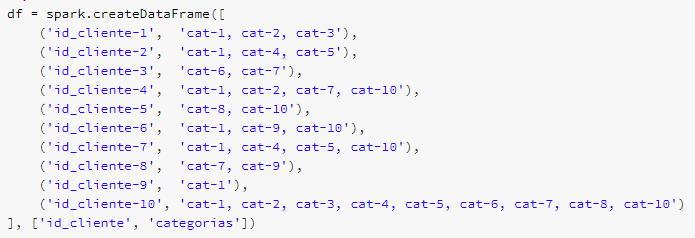

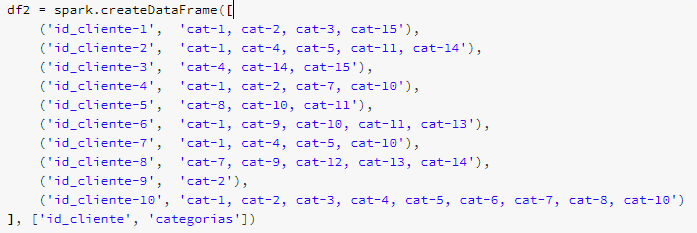

In [2]:
from IPython.display import Image
display(Image("modelo1.png"))
display(Image("modelo2.png"))

Resultado esperado:

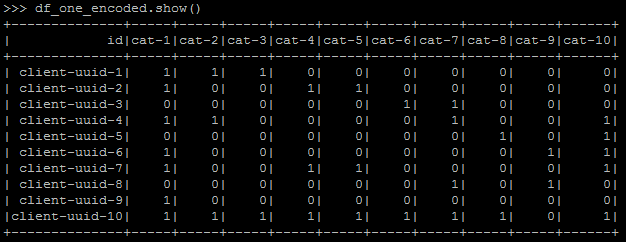

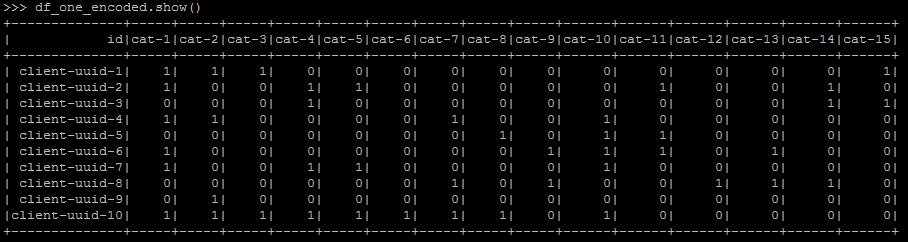

In [3]:
display(Image("modelo3.png"))
display(Image("modelo4.png"))